## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [3]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

'wget' is not recognized as an internal or external command,
operable program or batch file.


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [17]:
import pandas as pd
import numpy as np
import random

In [5]:
#1

file_name="C:/Users/Admin/Documents/GitHub/LaboratoryOfComputationalPhysics_Y5/data_000637.txt"
data=pd.read_csv(file_name)

N = 12000
fdata = data[:N]
print(fdata)


       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0         1     0          123  3869200167        2374        26
1         1     0          124  3869200167        2374        27
2         1     0           63  3869200167        2553        28
3         1     0           64  3869200167        2558        19
4         1     0           64  3869200167        2760        25
...     ...   ...          ...         ...         ...       ...
11995     1     0          139  3869200286        3251         0
11996     1     0           62  3869200286        3246         4
11997     1     0           58  3869200286        3246        11
11998     1     0           61  3869200286        3251        17
11999     1     0           59  3869200286        3248        16

[12000 rows x 6 columns]


In [6]:
#2
filtered = fdata.loc[:, ['ORBIT_CNT', 'BX_COUNTER']].drop_duplicates()
print(filtered)
grouped = filtered.groupby('ORBIT_CNT').count()
print(grouped.sort_values('ORBIT_CNT'))

        ORBIT_CNT  BX_COUNTER
0      3869200167        2374
2      3869200167        2553
3      3869200167        2558
4      3869200167        2760
5      3869200167        2762
...           ...         ...
11989  3869200286        3017
11993  3869200286        3245
11994  3869200286        3246
11995  3869200286        3251
11999  3869200286        3248

[9072 rows x 2 columns]
            BX_COUNTER
ORBIT_CNT             
3869200167          34
3869200168          68
3869200169          95
3869200170          80
3869200171          83
...                ...
3869200282          44
3869200283          56
3869200284         103
3869200285          69
3869200286          82

[120 rows x 1 columns]


In [7]:
print(filtered.iloc[0, 0])

3869200167


In [8]:
#3
tdc_count = fdata.TDC_MEAS.nunique() * 30
bx_count = fdata.BX_COUNTER.nunique() * 25
orbit_count = grouped.BX_COUNTER.count() + filtered.iloc[0, 0]

print(orbit_count)

time_taken = tdc_count + bx_count + orbit_count

print(time_taken)


3869200287
3869282862


In [11]:
#4
abstime = fdata['ORBIT_CNT'] + fdata['BX_COUNTER']*25 + fdata['TDC_MEAS']*30
fdata['ABS_TIME'] = pd.Series(abstime, index=fdata.index)
print(fdata)


       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS    ABS_TIME
0         1     0          123  3869200167        2374        26  3869260297
1         1     0          124  3869200167        2374        27  3869260327
2         1     0           63  3869200167        2553        28  3869264832
3         1     0           64  3869200167        2558        19  3869264687
4         1     0           64  3869200167        2760        25  3869269917
...     ...   ...          ...         ...         ...       ...         ...
11995     1     0          139  3869200286        3251         0  3869281561
11996     1     0           62  3869200286        3246         4  3869281556
11997     1     0           58  3869200286        3246        11  3869281766
11998     1     0           61  3869200286        3251        17  3869282071
11999     1     0           59  3869200286        3248        16  3869281966

[12000 rows x 7 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_38820\1404275599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdata['ABS_TIME'] = pd.Series(abstime, index=fdata.index)


In [13]:
print(np.random.random([0, 1]))

[]


In [20]:
#5
fdata['HEAD'] = pd.Series(random.choices([0, 1], k=len(fdata)))
print(fdata)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS    ABS_TIME
0         0     0          123  3869200167        2374        26  3869260297
1         1     0          124  3869200167        2374        27  3869260327
2         1     0           63  3869200167        2553        28  3869264832
3         0     0           64  3869200167        2558        19  3869264687
4         1     0           64  3869200167        2760        25  3869269917
...     ...   ...          ...         ...         ...       ...         ...
11995     0     0          139  3869200286        3251         0  3869281561
11996     1     0           62  3869200286        3246         4  3869281556
11997     1     0           58  3869200286        3246        11  3869281766
11998     0     0           61  3869200286        3251        17  3869282071
11999     1     0           59  3869200286        3248        16  3869281966

[12000 rows x 7 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_38820\700905447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdata['HEAD'] = pd.Series(random.choices([0, 1], k=len(fdata)))


In [21]:
#6
ones_fdata = fdata[fdata['HEAD']==1]
print(ones_fdata)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS    ABS_TIME
1         1     0          124  3869200167        2374        27  3869260327
2         1     0           63  3869200167        2553        28  3869264832
4         1     0           64  3869200167        2760        25  3869269917
7         1     0          139  3869200167        2776         0  3869269567
8         1     0           62  3869200167        2774        21  3869270147
...     ...   ...          ...         ...         ...       ...         ...
11993     1     0           61  3869200286        3245        20  3869282011
11994     1     0           57  3869200286        3246         4  3869281556
11996     1     0           62  3869200286        3246         4  3869281556
11997     1     0           58  3869200286        3246        11  3869281766
11999     1     0           59  3869200286        3248        16  3869281966

[5986 rows x 7 columns]


       FPGA  TDC_CHANNEL
0         0          123
1         0          124
2         0           63
3         0           64
4         0           64
...     ...          ...
11995     0          139
11996     0           62
11997     0           58
11998     0           61
11999     0           59

[12000 rows x 2 columns]
       FPGA  TDC_CHANNEL
0         0          123
1         0          124
2         0           63
3         0           64
4         0           64
...     ...          ...
11995     0          139
11996     0           62
11997     0           58
11998     0           61
11999     0           59

[8381 rows x 2 columns]


<AxesSubplot:xlabel='TDC_CHANNEL'>

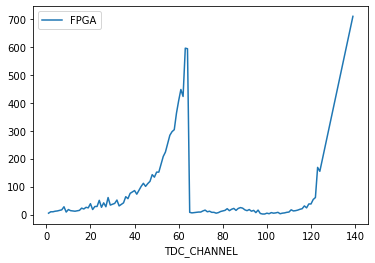

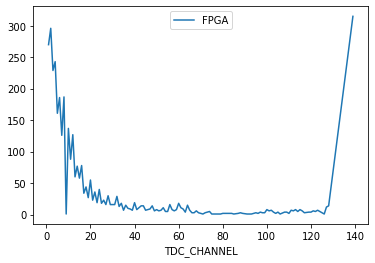

In [36]:
#7
filt = fdata[['FPGA', 'TDC_CHANNEL']]
print(filt)

filt_zero = filt[filt['FPGA']==0]
filt_one= filt[filt['FPGA']==1]

print(filt_zero)

group_zero = filt_zero.groupby('TDC_CHANNEL').count()
group_one = filt_one.groupby('TDC_CHANNEL').count()

group_zero.plot()
group_one.plot()

#group = filt.groupby(['TDC_CHANNEL', 'FPGA']).size()
#print(group)